<a href="https://colab.research.google.com/github/lixali/intro_to_ML_homework_practice/blob/main/2_advertising_hw_solution_s21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Assignment: Linear regression on the Advertising data
=====================================================

This is a solution notebook for Summer 2021.

To illustrate principles of linear regression, we are going to use some
data from the textbook “An Introduction to Statistical Learning
withApplications in R” (Gareth James, Daniela Witten, Trevor Hastie,
Robert Tibshirani) (available via NYU Library).

The dataset is described as follows:

> Suppose that we are statistical consultants hired by a client to
> provide advice on how to improve sales of a particular product. The
> `Advertising` data set consists of the sales of that product in 200
> different markets, along with advertising budgets for the product in
> each of those markets for three different media: TV, radio, and
> newspaper.
>
> …
>
> It is not possible for our client to directly increase sales of the
> product. On the other hand, they can control the advertising
> expenditure in each of the three media. Therefore, if we determine
> that there is an association between advertising and sales, then we
> can instruct our client to adjust advertising budgets, thereby
> indirectly increasing sales. In other words, our goal is to develop an
> accurate model that can be used to predict sales on the basis of the
> three media budgets.

Sales are reported in thousands of units, and TV, radio, and newspaper
budgets, are reported in thousands of dollars.

For this assignment, you will fit a linear regression model to a small
dataset. You will iteratively improve your linear regression model by
examining the residuals at each stage, in order to identify problems
with the model.

Make sure to include your name and net ID in a text cell at the top of
the notebook.

In [ ]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set()

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### 1. Read in and pre-process data

In this section, you will read in the “Advertising” data, and make sure
it is loaded correctly. Visually inspect the data using a pairplot, and
note any meaningful observations. In particular, comment on which
features appear to be correlated with product sales, and which features
appear to be correlated with one another. Then, split the data into
training data (70%) and test data (30%).

**The code in this section is provided for you**. However, you should
add a text cell at the end of this section, in which you write your
comments and observations.

#### Read in data

In [ ]:
url = 'https://www.statlearning.com/s/Advertising.csv'
df  = pd.read_csv(url, index_col=0)
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


Note that in this dataset, the first column in the data file is the row
label; that’s why we use `index_col=0` in the `read_csv` command. If we
would omit that argument, then we would have an additional (unnamed)
column in the dataset, containing the row number.

(You can try removing the `index_col` argument and re-running the cell
above, to see the effect and to understand why we used this argument.)

#### Visually inspect the data

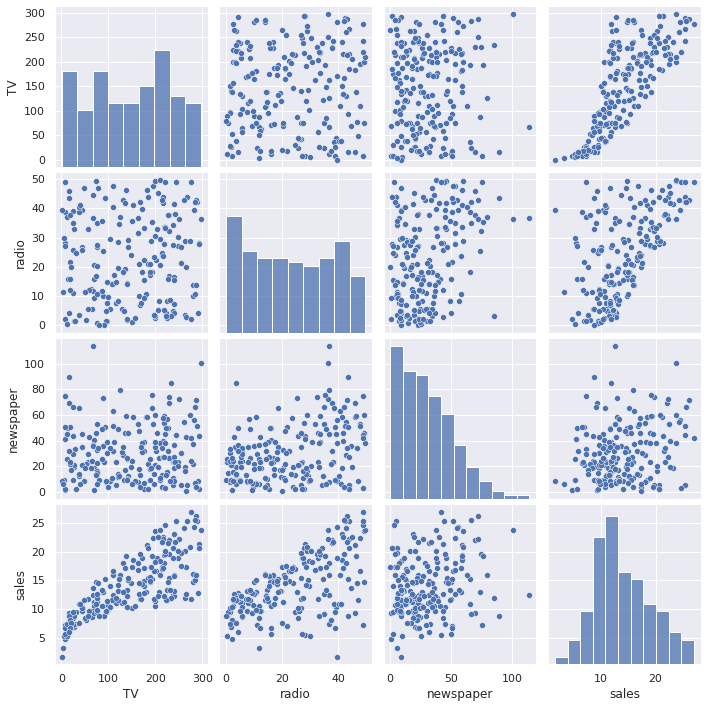

In [ ]:
sns.pairplot(df);

The most important panels here are on the bottom row, where `sales` is
on the vertical axis and the advertising budgets are on the horizontal
axes.

#### Split up data

We will use 70% of the data for training and the remaining 30% to test
the regression model.

In [ ]:
train, test = train_test_split(df, test_size=0.3)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140 entries, 161 to 196
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         140 non-null    float64
 1   radio      140 non-null    float64
 2   newspaper  140 non-null    float64
 3   sales      140 non-null    float64
dtypes: float64(4)
memory usage: 5.5 KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 135 to 103
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         60 non-null     float64
 1   radio      60 non-null     float64
 2   newspaper  60 non-null     float64
 3   sales      60 non-null     float64
dtypes: float64(4)
memory usage: 2.3 KB


#### Comments on data

It appears from the bottom row of the pairplot, which shows sales on the vertical axis and each type of advertising on the horizontal axis, that each type of advertising - TV, radio, and newspaper - *potentially* has a positive association with sales. 

* There appears to be a positive association between TV ads and sales. 
* There also appears to be a positive association between radio ads and sales, but it's not as "tight". 
* And there may or may not be a positive association between newspapers ads and sales, it's difficult to see one visually.

From the other rows of the pairplot: There isn't any obvious visual correlation between the budgets for most types of advertising.  There appears to be a slight correlation between newspaper ad budgets and other ad budgets, but it's difficult to be sure from a visual inspection.

### 2. Fit simple linear regression models

Use the training data to fit a simple linear regression to predict
product sales, for each of three features: TV ad budget, radio ad
budget, and newspaper ad budget. In other words, you will fit *three*
regression models, with each model being trained on one feature. For
each of the three regression models, create a plot of the training data
and the regression line, with product sales ($y$) on the vertical axis
and the feature on which the model was trained ($x$) on the horizontal
axis.

Also, for each regression model, print the intercept and coefficients,
and compute the MSE and R2 on the training data, and MSE and R2 on the
test data.

Comment on the results. Which type of ads seems to have the greatest
association with increased product sales? Which regression model is most
effective at predicting product sales?

**The code in this section is provided for you**. However, you should
add text cells in which you write your comments, observations, and
answers to the questions.

#### Fit a simple linear regression

In [ ]:
reg_tv    = LinearRegression().fit(train[['TV']], train['sales'])
reg_radio = LinearRegression().fit(train[['radio']], train['sales'])
reg_news  = LinearRegression().fit(train[['newspaper']], train['sales'])

#### Look at coefficients

In [ ]:
print("TV       : ", reg_tv.coef_[0], reg_tv.intercept_)
print("Radio    : ", reg_radio.coef_[0], reg_radio.intercept_)
print("Newspaper: ", reg_news.coef_[0], reg_news.intercept_)

TV       :  0.04907731197911381 6.8335902761142915
Radio    :  0.2021861782074477 9.09524469936526
Newspaper:  0.03951795334591893 12.575528001281219


#### Plot data and regression line

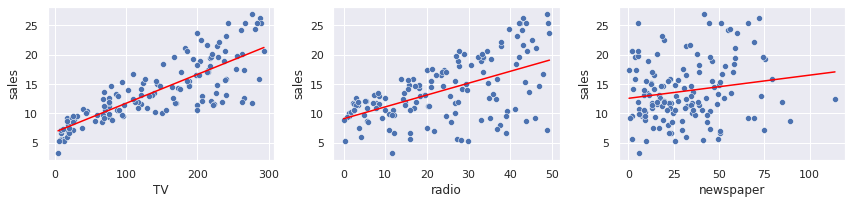

In [ ]:
fig = plt.figure(figsize=(12,3))

plt.subplot(1,3,1)
sns.scatterplot(data=train, x="TV", y="sales");
sns.lineplot(data=train, x="TV", y=reg_tv.predict(train[['TV']]), color='red');

plt.subplot(1,3,2)
sns.scatterplot(data=train, x="radio", y="sales");
sns.lineplot(data=train, x="radio", y=reg_radio.predict(train[['radio']]), color='red');

plt.subplot(1,3,3)
sns.scatterplot(data=train, x="newspaper", y="sales");
sns.lineplot(data=train, x="newspaper", y=reg_news.predict(train[['newspaper']]), color='red');

plt.tight_layout();

#### Compute R2, MSE for simple regression

In [ ]:
y_pred_tr_tv    = reg_tv.predict(train[['TV']])
y_pred_tr_radio = reg_radio.predict(train[['radio']])
y_pred_tr_news  = reg_news.predict(train[['newspaper']])

In [ ]:
r2_tr_tv    = metrics.r2_score(train['sales'], y_pred_tr_tv)
r2_tr_radio = metrics.r2_score(train['sales'], y_pred_tr_radio)
r2_tr_news  = metrics.r2_score(train['sales'], y_pred_tr_news)
print("TV       : ", r2_tr_tv)
print("Radio    : ", r2_tr_radio)
print("Newspaper: ", r2_tr_news)

TV       :  0.6529129772366906
Radio    :  0.3039592815440729
Newspaper:  0.02793532732783699


In [ ]:
mse_tr_tv    = metrics.mean_squared_error(train['sales'], y_pred_tr_tv)
mse_tr_radio = metrics.mean_squared_error(train['sales'], y_pred_tr_radio)
mse_tr_news  = metrics.mean_squared_error(train['sales'], y_pred_tr_news)
print("TV       : ", mse_tr_tv)
print("Radio    : ", mse_tr_radio)
print("Newspaper: ", mse_tr_news)

TV       :  9.456002722779596
Radio    :  18.962860888558904
Newspaper:  26.48282876820223


In [ ]:
y_pred_ts_tv    = reg_tv.predict(test[['TV']])
y_pred_ts_radio = reg_radio.predict(test[['radio']])
y_pred_ts_news  = reg_news.predict(test[['newspaper']])

In [ ]:
r2_ts_tv    = metrics.r2_score(test['sales'], y_pred_ts_tv)
r2_ts_radio = metrics.r2_score(test['sales'], y_pred_ts_radio)
r2_ts_news  = metrics.r2_score(test['sales'], y_pred_ts_news)
print("TV       : ", r2_ts_tv)
print("Radio    : ", r2_ts_radio)
print("Newspaper: ", r2_ts_news)

TV       :  0.5058119539541877
Radio    :  0.3849321305554356
Newspaper:  0.07746323788210785


In [ ]:
mse_ts_tv    = metrics.mean_squared_error(test['sales'], y_pred_ts_tv)
mse_ts_radio = metrics.mean_squared_error(test['sales'], y_pred_ts_radio)
mse_ts_news  = metrics.mean_squared_error(test['sales'], y_pred_ts_news)
print("TV       : ", mse_ts_tv)
print("Radio    : ", mse_ts_radio)
print("Newspaper: ", mse_ts_news)

TV       :  13.0387274168459
Radio    :  16.228037802040223
Newspaper:  24.340340624426428


#### Comments on simple linear regression results

Radio ads seem to have the greatest association with increased product sales, since the coefficient for the radio feature is greatest. (Note that all the features are on the same scale - thousands of dollars - so they are comparable).


However, the TV regression model is most effective at predicting sales - the R2 for the TV regression is highest.

### 3. Explore the residuals for the single linear regression models

We know that computing MSE or R2 is not sufficient to diagnose a problem
with a linear regression.

Create some additional plots as described below to help you identify any
problems with the regression. Use training data for all of the items
below.

For each of the three regression models,

-   Plot predicted sales ($\hat{y}$) on the vertical axis, and actual
    sales ($y$) on the horizontal axis. Make sure both axes use the same
    scale. Comment on your observations. What would you expect this plot
    to look like for a model that explains the data well?
-   Compute the residuals ($y - \hat{y}$). Note that some of these will
    be negative, and some will be positive. What is the mean residual
    for each of the regression models? What *should* be the mean
    residual for a fitted linear regression model? Explain your answer.
-   Plot the residuals ($y - \hat{y}$) on the vertical axis, and actual
    sales ($y$) on the horizontal axis. Use the same scale for all three
    subplots. Comment on your observations. Is there a pattern in the
    residuals (and if so, what might it indicate), or do they appear to
    have no pattern with respect to actual sales?
-   For each of the three regression models AND each of the three
    features, plot the residuals ($y - \hat{y}$) on the vertical axis,
    and the feature ($x$) on the horizontal axis. This plot will include
    nine subplots in total. Make sure to clearly label each axis, and
    also label each subplot with a title that indicates which regression
    model it uses. Is there a pattern in the residuals (and if so, what
    might it indicate), or do they appear to have no pattern with
    respect to each of the three features?

**The code in this section is not provided for you**. You will need to
write code, in addition to the text cells in which you write your
comments, observations, and answers to the questions.

#### Plot of predicted vs. actual sales

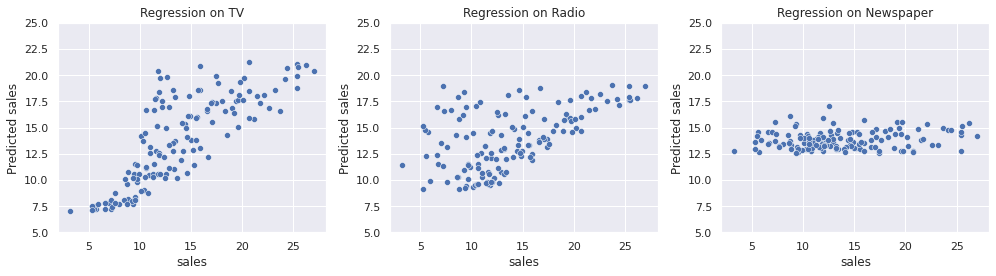

In [ ]:
fig = plt.figure(figsize=(14,4))

plt.subplot(1,3,1)
sns.scatterplot(data=train, x="sales", y=reg_tv.predict(train[['TV']]));

plt.ylabel('Predicted sales');
plt.ylim(5,25);
plt.title("Regression on TV");

plt.subplot(1,3,2)
sns.scatterplot(data=train, x="sales", y=reg_radio.predict(train[['radio']]));
plt.ylabel('Predicted sales');
plt.ylim(5,25);
plt.title("Regression on Radio");

plt.subplot(1,3,3)
sns.scatterplot(data=train, x="sales", y=reg_news.predict(train[['newspaper']]));
plt.ylabel('Predicted sales');
plt.ylim(5,25);
plt.title("Regression on Newspaper");

plt.tight_layout();

#### Comment on predicted vs. actual sales

For a model that fits the data very well, the plot of predicted vs. actual sales should show points along the line $y=x$. 

For our regression models,


* The TV regression fits the data best - the predicted vs. actual plot is most similar to the line $y=x$. 
* The radio regression does not fit the data as well.
* The regression on newspaper is the worst fit. The predicted sales is approximately 13-15 thousands of units for almost all samples (moderate sales), where the actual data includes sales in the range of 5-25 thousands of units.

#### Compute residuals and mean

In [ ]:
residual_tv_train = train['sales'] - reg_tv.predict(train[['TV']]) 
residual_news_train = train['sales'] -  reg_news.predict(train[['newspaper']]) 
residual_radio_train = train['sales'] -  reg_radio.predict(train[['radio']])


In [ ]:
residual_tv_test = test['sales'] - reg_tv.predict(test[['TV']]) 
residual_news_test = test['sales'] -  reg_news.predict(test[['newspaper']]) 
residual_radio_test = test['sales'] -  reg_radio.predict(test[['radio']])


In [ ]:
print("Mean residual for TV regression, training data:        ", np.mean(residual_tv_train))
print("Mean residual for radio regression, training data:     ", np.mean(residual_radio_train))
print("Mean residual for newspaper regression, training data: ", np.mean(residual_news_train))

Mean residual for TV regression, training data:         -8.881784197001252e-16
Mean residual for radio regression, training data:      3.6795963101862333e-16
Mean residual for newspaper regression, training data:  -2.283887364943179e-16


In [ ]:
print("Mean residual for TV regression, test data:        ", np.mean(residual_tv_test))
print("Mean residual for radio regression, test data:     ", np.mean(residual_news_test))
print("Mean residual for newspaper regression, test data: ", np.mean(residual_radio_test))

Mean residual for TV regression, test data:         -0.09180307601044432
Mean residual for radio regression, test data:      0.7984681739585812
Mean residual for newspaper regression, test data:  0.7453201693889215


#### Comment on residuals

For a well-fitted model, the mean of the residuals should be close to 0, indicating that *on average*, the model does not consistently over-estimate or under-estimate the target variable.

Here, the mean of residuals is close to zero for the training data, so it doesn't suggest any obvious problem with our model.

#### Plot of residuals against actual sales

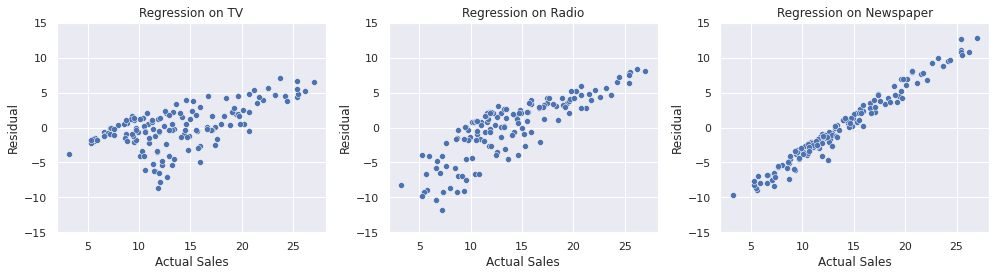

In [ ]:
fig = plt.figure(figsize=(14,4))

plt.subplot(1,3,1)
sns.scatterplot(x=train['sales'], y=residual_tv_train);
plt.xlabel('Actual Sales')
plt.ylabel('Residual');
plt.ylim(-15, 15)
plt.title("Regression on TV");

plt.subplot(1,3,2)
sns.scatterplot(x=train['sales'], y=residual_radio_train);
plt.xlabel('Actual Sales')
plt.ylabel('Residual');
plt.ylim(-15, 15)
plt.title("Regression on Radio");

plt.subplot(1,3,3)
sns.scatterplot(x=train['sales'], y=residual_news_train);
plt.xlabel('Actual Sales')
plt.ylabel('Residual');
plt.ylim(-15, 15)
plt.title("Regression on Newspaper");

plt.tight_layout();

#### Comments on plot of residuals against actual sales

If a model captures everything "learnable" about the target variable, the residual plot should have no obvious pattern, since the error term will not include any systematic error and will just be due to random noise that is not "learnable". A pattern in the residuals suggests that the model does *not* capture everything "learnable" about the target variable - i.e. there is a systematic error.

There is a pattern in the residuals (for all three regression models, but especially for the regression on newspaper, where there is a very obvious linear pattern). This suggests something "learnable" that isn't captured by our model.

#### Plot of residuals against features

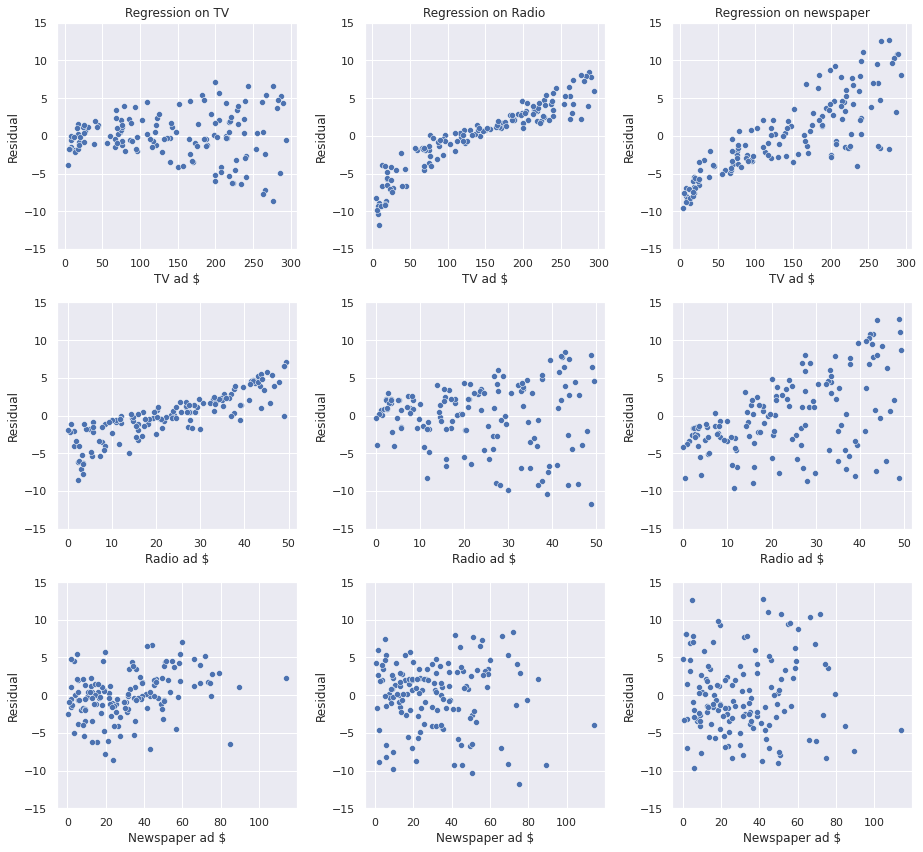

In [ ]:
plt.figure(figsize=(13,12))

plt.subplot(3,3,1)
sns.scatterplot(x=train['TV'], y=residual_tv_train);
plt.xlabel('TV ad $')
plt.ylabel('Residual');
plt.ylim(-15, 15);
plt.title("Regression on TV");

plt.subplot(3,3,2)
sns.scatterplot(x=train['TV'], y=residual_radio_train);
plt.xlabel('TV ad $')
plt.ylabel('Residual');
plt.ylim(-15, 15);
plt.title("Regression on Radio");

plt.subplot(3,3,3)
sns.scatterplot(x=train['TV'], y=residual_news_train);
plt.xlabel('TV ad $')
plt.ylabel('Residual');
plt.ylim(-15, 15);
plt.title("Regression on newspaper");

plt.subplot(3,3,4)
sns.scatterplot(x=train['radio'], y=residual_tv_train);
plt.xlabel('Radio ad $')
plt.ylabel('Residual');
plt.ylim(-15, 15);

plt.subplot(3,3,5)
sns.scatterplot(x=train['radio'], y=residual_radio_train);
plt.xlabel('Radio ad $')
plt.ylabel('Residual');
plt.ylim(-15, 15);

plt.subplot(3,3,6)
sns.scatterplot(x=train['radio'], y=residual_news_train);
plt.xlabel('Radio ad $')
plt.ylabel('Residual');
plt.ylim(-15, 15);

plt.subplot(3,3,7)
sns.scatterplot(x=train['newspaper'], y=residual_tv_train);
plt.xlabel('Newspaper ad $')
plt.ylabel('Residual');
plt.ylim(-15, 15);

plt.subplot(3,3,8)
sns.scatterplot(x=train['newspaper'], y=residual_radio_train);
plt.xlabel('Newspaper ad $')
plt.ylabel('Residual');
plt.ylim(-15, 15);

plt.subplot(3,3,9)
sns.scatterplot(x=train['newspaper'], y=residual_news_train);
plt.xlabel('Newspaper ad $')
plt.ylabel('Residual');
plt.ylim(-15, 15);

plt.tight_layout();

#### Comments on plot of residuals against features

A pattern in the plot of residuals against a feature that is *not* included in the model, suggests that the error in the model is related to the value of that feature.  (This, in turn, implies that we could improve the model by including that feature in the model.) 

* Here, for example, we see a relationship between the error term in the regression on radio, and the TV ad buget. This suggests that we could improve the regression on radio model by including the TV ad budget as a feature.

* We also see a relationship in the error term of regression on TV vs. radio budget, and in the error term of regression on newspaper vs. TV budget and vs. radio budget.

* All of the above suggests that to predict sales, a model should include both TV and radio budgets. (Newspaper budgets appear to be less relevant - the residual doesn't have any obvious pattern relative to newspaper ad budget.)


A pattern in the plot of residuals against a feature that *is* included in the model, suggests that the error in the model is related to a non-linear function of that feature.  (This, in turn, suggests that we could improve the model by including a *transformed* version of that feature in the model.) 

* Here, we see in the top-left plot, that the TV model residuals seem to be related to the value of the TV feature by some non-linear relationship.

### 4. Try a multiple linear regression

Next, fit a multiple linear regression to predict product sales, using
all three features to train a single model: TV ad budget, radio ad
budget, and newspaper ad budget.

Print the intercept and coefficients, and compute the MSE and R2 on the
training data, and MSE and R2 on the test data. Comment on the results.
Make sure to explain any differences between the coefficients of the
multiple regression model, and the coefficients of the three simple
linear regression models. If they are different, why?

**The code in the first part of this section is provided for you**.
However, you should add text cells in which you write your comments,
observations, and answers to the questions.

Also repeat the analysis of part (3) for this regression model. Use
training data for all of these items:

-   Plot predicted sales ($\hat{y}$) on the vertical axis, and actual
    sales ($y$) on the horizontal axis. Make sure both axes use the same
    scale. Comment on your observations. What would you expect this plot
    to look like for a model that explains the data well?
-   Compute the residuals ($y - \hat{y}$). What is the mean of the
    residuals? What *should* be the mean of the residuals for a fitted
    linear regression model? Explain your answer.
-   Plot the residuals ($y - \hat{y}$) on the vertical axis, and actual
    sales ($y$) on the horizontal axis. Comment on your observations. Is
    there a pattern in the residuals (and if so, what might it
    indicate), or do they appear to have no pattern with respect to
    actual sales?
-   For each of the three features, plot the residuals ($y - \hat{y}$)
    on the vertical axis, and the feature ($x$) on the horizontal axis.
    Make sure to clearly label each axis. Is there a pattern in the
    residuals (and if so, what might it indicate), or do they appear to
    have no pattern with respect to each of the three features?

**The code in the last part of this section is not provided for you**.
You will need to write code, in addition to the text cells in which you
write your comments, observations, and answers to the questions.

#### Fit a multiple linear regression

In [ ]:
reg_multi = LinearRegression().fit(train[['TV', 'radio', 'newspaper']], train['sales'])

#### Look at coefficients

In [ ]:
print("Coefficients (TV, radio, newspaper):", reg_multi.coef_)
print("Intercept: ", reg_multi.intercept_)

Coefficients (TV, radio, newspaper): [ 0.04730938  0.18949669 -0.00567022]
Intercept:  2.8388519921372435


#### Compute R2, MSE for multiple regression

In [ ]:
y_pred_tr_multi = reg_multi.predict(train[['TV', 'radio', 'newspaper']])

r2_tr_multi  = metrics.r2_score(train['sales'], y_pred_tr_multi)
mse_tr_multi = metrics.mean_squared_error(train['sales'], y_pred_tr_multi)

print("Multiple regression R2:  ", r2_tr_multi)
print("Multiple regression MSE: ", mse_tr_multi)


Multiple regression R2:   0.9102668630395861
Multiple regression MSE:  2.444680243778116


In [ ]:
y_pred_ts_multi = reg_multi.predict(test[['TV', 'radio', 'newspaper']])

r2_ts_multi  = metrics.r2_score(test['sales'], y_pred_ts_multi)
mse_ts_multi = metrics.mean_squared_error(test['sales'], y_pred_ts_multi)

print("Multiple regression R2:  ", r2_ts_multi)
print("Multiple regression MSE: ", mse_ts_multi)


Multiple regression R2:   0.8612262408899336
Multiple regression MSE:  3.6614265199758638


#### Comment on multiple linear regression results

The multiple linear regression is much more effective at predicting sales (higher R2) than any of the individual simple linear regressions.

The coefficients for TV, radio, and newspaper ads are different than they had been in the single regression case. In particular, we previously estimated that newspaper ads was associated with a positive effect on sales, similar in magnitude to TV ads. Now, the newspaper ads are estimated as having an association much closer to zero.

This is because:

* In the simple regression case, the coefficent for newspaper ads represents the effect of an increase in newspaper advertising.
* In the multiple regression case, the coefficient for newspaper ads represents the effect of an increase in newspaper advertising while holding TV and radio advertising constant.

It turns out that in the simple linear regression on newspaper ad budget, the regression was "learning" the effect of a feature that was correlated with newspaper ad budget, not the effect of newspaper ad budget itself. We observe that there is a correlation between newspaper ad budget and radio ad budget, and a smaller correlation between newspaper ad budget and TV ad budget. (This is logical; if an ad campaign spends a lot of money on one medium, they are likely to spend a lot on others as well.)


In [ ]:
np.corrcoef(np.column_stack([train['TV'], train['radio'], train['newspaper']]), rowvar=False)

array([[ 1.        ,  0.0560713 , -0.00561808],
       [ 0.0560713 ,  1.        ,  0.37833904],
       [-0.00561808,  0.37833904,  1.        ]])

#### Plot of predicted vs. actual sales

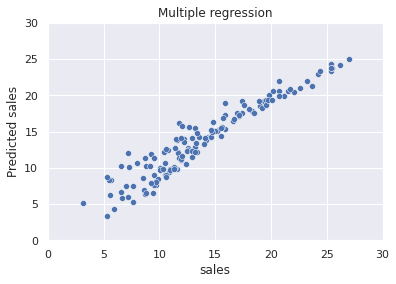

In [ ]:
sns.scatterplot(data=train, x="sales", y=reg_multi.predict(train[['TV', 'radio', 'newspaper']]));

plt.ylabel('Predicted sales');
plt.ylim(0,30);
plt.xlim(0,30);
plt.title("Multiple regression");


#### Comment on predicted vs. actual sales

For a model that fits the data very well, the plot of predicted vs. actual sales should show points along the line $y=x$. 

For our multiple regresion model, the fit seems mostly good, but not as "tight" along $y=x$ as we might like to see.


#### Compute residuals and mean

In [ ]:
residual_multi_train = train['sales'] - reg_multi.predict(train[['TV', 'radio', 'newspaper']]) 
residual_multi_test = test['sales'] - reg_multi.predict(test[['TV', 'radio', 'newspaper']]) 

In [ ]:
print("Mean of residuals for training data: ", np.mean(residual_multi_train))
print("Mean of residuals for test data: ", np.mean(residual_multi_test))

Mean of residuals for training data:  4.884981308350689e-16
Mean of residuals for test data:  -0.026813884611571644


#### Comment on residuals

For a well-fitted model, the mean of the residuals should be close to 0, indicating that *on average*, the model does not consistently over-estimate or under-estimate the target variable.

Here, the mean of training set residuals is close to zero, so it doesn't suggest any obvious problem with our model.

#### Plot of residuals against actual sales

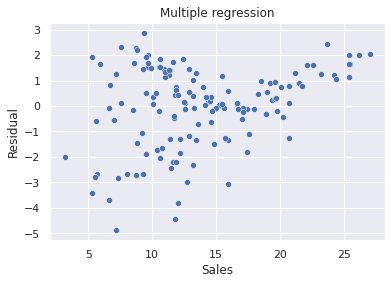

In [ ]:
sns.scatterplot(x=train['sales'], y=residual_multi_train);

plt.xlabel('Sales')
plt.ylabel('Residual');
plt.title("Multiple regression");


#### Comments on plot of residuals against actual sales

If a model captures everything "learnable" about the target variable, the residual plot should have no obvious pattern, since the error term will just be due to random noise that is not "learnable". A pattern in the residuals suggests that the model does *not* capture everything "learnable" about the target variable.

Here, we see a slight U-shaped pattern in the residuals, which suggests that sales may not be purely a linear function of our three features. We may be able to improve the model by adding non-linear transformation of features.

#### Plot of residuals against features

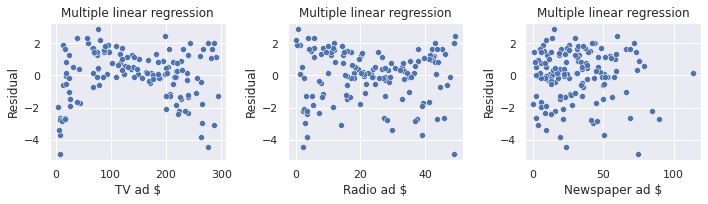

In [ ]:
plt.figure(figsize=(10,3))

plt.subplot(1,3,1)
sns.scatterplot(x=train['TV'], y=residual_multi_train);

plt.xlabel('TV ad $')
plt.ylabel('Residual');
plt.title("Multiple linear regression");

plt.subplot(1,3,2)
sns.scatterplot(x=train['radio'], y=residual_multi_train);
plt.xlabel('Radio ad $')
plt.ylabel('Residual');
plt.title("Multiple linear regression");

plt.subplot(1,3,3)
sns.scatterplot(x=train['newspaper'], y=residual_multi_train);
plt.xlabel('Newspaper ad $')
plt.ylabel('Residual');
plt.title("Multiple linear regression");

plt.tight_layout();

#### Comments on plot of residuals against features

The plot of residuals against newspaper ad sales doesn't have an obvious pattern, which suggests that the error term is not a function of newspaper ad sales. Our model seems to capture everything that is "learnable" from newspaper ad budgets.

But, in the residuals against the radio and TV ad budget features, we see more variance for small and large values of the feature than for moderate values (heteroscedasticity). This suggests that sales may actually be predicted in part by a non-linear transformation of those features.

### 5. Linear regression with interaction terms

Our multiple linear regression includes additive effects of all three
types of advertising media. However, it does not include *interaction*
effects, in which combining different types of advertising media
together results in a bigger boost in sales than just the additive
effect of the individual media. The pattern in the residuals plots from
parts (1) through (4) suggest that a model including an interaction
effect may explain sales data better than a model including additive
effects. Add four columns to your data frame:

-   `newspaper` $\times$ `radio`
-   `TV` $\times$ `radio`
-   `newspaper` $\times$ `TV`
-   `newspaper` $\times$ `radio` $\times$ `TV`

Then, train a linear regression model on all seven features: the three
types of ad budgets, and the four interaction effects. Repeat the
analysis of part (4) for the model including interaction effects.
Comment on the results. Are the interaction effects helpful for
explaining the effect of ads on product sales? Are there any patterns
evident in the residual plots that suggest further opportunities for
improving the model?

(If you think the results suggest further opportunities for improving
the model, you are welcome to try and to comment on the results!)

**The code in this section is not provided for you**. You will need to
write code, in addition to the text cells in which you write your
comments, observations, and answers to the questions.

#### Add interaction terms to the data


In [ ]:
train = train.assign( TV_radio_interaction       = train['TV']*train['radio'])
train = train.assign( TV_news_interaction        = train['TV']*train['newspaper'])
train = train.assign( news_radio_interaction     = train['newspaper']*train['radio'])
train = train.assign( TV_news_radio_interaction  = train['TV']*train['newspaper']*train['radio'])

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140 entries, 161 to 196
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   TV                         140 non-null    float64
 1   radio                      140 non-null    float64
 2   newspaper                  140 non-null    float64
 3   sales                      140 non-null    float64
 4   TV_radio_interaction       140 non-null    float64
 5   TV_news_interaction        140 non-null    float64
 6   news_radio_interaction     140 non-null    float64
 7   TV_news_radio_interaction  140 non-null    float64
dtypes: float64(8)
memory usage: 9.8 KB


In [ ]:
test = test.assign( TV_radio_interaction       = test['TV']*test['radio'])
test = test.assign( TV_news_interaction        = test['TV']*test['newspaper'])
test = test.assign( news_radio_interaction     = test['newspaper']*test['radio'])
test = test.assign( TV_news_radio_interaction  = test['TV']*test['newspaper']*test['radio'])

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 135 to 103
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   TV                         60 non-null     float64
 1   radio                      60 non-null     float64
 2   newspaper                  60 non-null     float64
 3   sales                      60 non-null     float64
 4   TV_radio_interaction       60 non-null     float64
 5   TV_news_interaction        60 non-null     float64
 6   news_radio_interaction     60 non-null     float64
 7   TV_news_radio_interaction  60 non-null     float64
dtypes: float64(8)
memory usage: 4.2 KB


#### Multiple linear regression with interaction terms

In [ ]:
features = ['TV', 'radio', 'newspaper',
     'TV_radio_interaction', 'TV_news_interaction',
     'news_radio_interaction', 'TV_news_radio_interaction']
reg_inter = LinearRegression().fit(train[features], train['sales'])


#### Intercept and coefficients

In [ ]:
pd.DataFrame({'features': features, 'coefficients':reg_inter.coef_ })

,features,coefficients
0,TV,2.100580e-02
1,radio,3.471404e-02
2,newspaper,8.169555e-03
3,TV_radio_interaction,1.045249e-03
4,TV_news_interaction,-3.025271e-05
5,news_radio_interaction,-1.769888e-04
6,TV_news_radio_interaction,4.402410e-07


#### MSE and R2

In [ ]:
y_pred_inter_train = reg_inter.predict(train[features])
r2_inter_train = 1-np.mean( (y_pred_inter_train - train['sales'])**2 / 
    np.std(train['sales'])**2 )
mse_inter_train = np.mean( (y_pred_inter_train - train['sales'])**2)


In [ ]:
print("Multiple regression with interaction, training R2:  ", r2_inter_train)
print("Multiple regression with interaction, training MSE: ", mse_inter_train)

Multiple regression with interaction, training R2:   0.9723932221103027
Multiple regression with interaction, training MSE:  0.7521161834683994


In [ ]:
y_pred_inter = reg_inter.predict(test[features])
r2_inter = 1-np.mean( (y_pred_inter - test['sales'])**2 / 
    np.std(test['sales'])**2 )
mse_inter = np.mean( (y_pred_inter - test['sales'])**2)


In [ ]:
print("Multiple regression with interaction, test R2:  ", r2_inter)
print("Multiple regression with interaction, test MSE: ", mse_inter)

Multiple regression with interaction, test R2:   0.9565143478162145
Multiple regression with interaction, test MSE:  1.1473316076843898


#### Comment on multiple linear regression with interaction terms results

The multiple linear regression with interaction terms is much more effective at predicting sales (higher R2) than the multiple linear regression with only the linear effect of each feature.

In particular, the coefficient for the TV-radio interaction suggests that the joint effect of TV and radio ads is greater than just the effect of TV ads plus the effect of radio ads. 

(Note, however, that the coefficient of the interaction term for the product of two features can't be directly compared to the coefficient for a single feature. The interaction term is in units of thousands of dollars squared, while the single feature is in units of thousands of dollars.)

#### Plot of predicted vs. actual sales

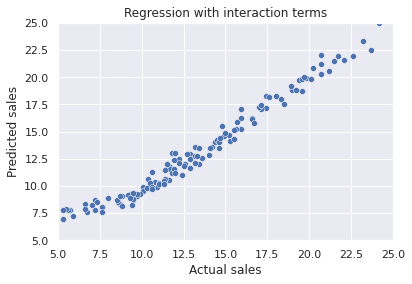

In [ ]:
sns.scatterplot(data=train, x="sales", y=reg_inter.predict(train[features]));

plt.ylabel('Predicted sales');
plt.ylim(5,25);
plt.xlabel('Actual sales');
plt.xlim(5,25);

plt.title("Regression with interaction terms");


#### Comment on predicted vs. actual sales

For a model that fits the data very well, the plot of predicted vs. actual sales should show points along the line $y=x$. 

For our multiple regresion model with interaction terms, the fit seems mostly good, but it's not as tight a fit on the bottom left (when actual sales are small, the model seems to over-estimate sales).

#### Compute residuals and mean

In [ ]:
residual_inter_train = train['sales'] - reg_inter.predict(train[features]) 
residual_inter_test = test['sales'] - reg_inter.predict(test[features]) 

In [ ]:
print("Mean of residuals for training data: ", np.mean(residual_inter_train))
print("Mean of residuals for test data: ", np.mean(residual_inter_test))

Mean of residuals for training data:  -9.579638669622779e-16
Mean of residuals for test data:  0.03138639822694643


#### Comment on residuals

For a well-fitted model, the mean of the residuals should be close to 0, indicating that *on average*, the model does not consistently over-estimate or under-estimate the target variable.

Here, the mean of residuals is close to zero, so it doesn't suggest any obvious problem with our model.

#### Plot of residuals against actual sales

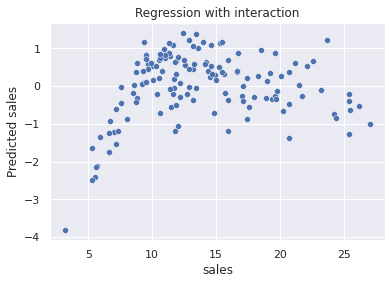

In [ ]:
sns.scatterplot(data=train, x="sales", y=residual_inter_train);

plt.ylabel('Predicted sales');
plt.title("Regression with interaction");


#### Comments on plot of residuals against actual sales

If a model captures everything "learnable" about the target variable, the residual plot should have no obvious pattern, since the error term will just be due to random noise that is not "learnable". A pattern in the residuals suggests that the model does *not* capture everything "learnable" about the target variable.

Here, we see a pattern in which the residuals are more strongly negative (model tends to over-estimate sales) for samples with low sales.

#### Plot of residuals against features

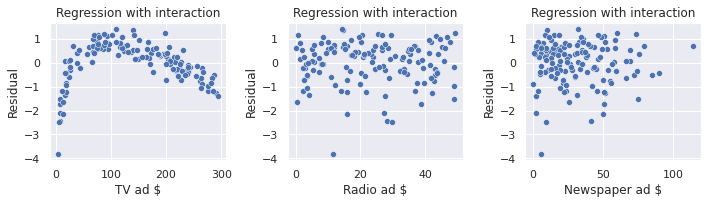

In [ ]:
plt.figure(figsize=(10,3))

plt.subplot(1,3,1)
sns.scatterplot(x=train['TV'], y=residual_inter_train);
plt.xlabel('TV ad $')
plt.ylabel('Residual');
plt.title("Regression with interaction");

plt.subplot(1,3,2)
sns.scatterplot(x=train['radio'], y=residual_inter_train);
plt.xlabel('Radio ad $')
plt.ylabel('Residual');
plt.title("Regression with interaction");

plt.subplot(1,3,3)
sns.scatterplot(x=train['newspaper'], y=residual_inter_train);
plt.xlabel('Newspaper ad $')
plt.ylabel('Residual');
plt.title("Regression with interaction");

plt.tight_layout();

#### Comments on plot of residuals against features

The plot of residuals against newspaper ad sales and radio ad sales doesn't have much of an obvious pattern, which suggests that the error term is not a function of newspaper ad sales. Our model seems to capture everything that is "learnable" from those two features.

But, we see a non-linear pattern in the residuals against the TV ad budget feature, which suggests that sales may actually be predicted in part by a non-linear transformation of that feature.

#### Multiple linear regression with interaction term and transformed feature

In [ ]:
train['TV_transformed'] = np.log(train['TV'])
test['TV_transformed']  = np.log(test['TV'])

In [ ]:
features = ['TV', 'radio', 'newspaper',
     'TV_radio_interaction', 'TV_news_interaction',
     'news_radio_interaction', 'TV_news_radio_interaction',
     'TV_transformed']
reg_bonus = LinearRegression().fit(train[features], train['sales'])
y_pred_bonus = reg_bonus.predict(test[features])
r2_bonus = 1-np.mean( (y_pred_bonus - test['sales'])**2 / np.std(test['sales'])**2 )

In [ ]:
print("Multiple regression with interaction and transformed feature, R2: ", r2_bonus)

Multiple regression with interaction and transformed feature, R2:  0.9966312299968878


In [ ]:
pd.DataFrame({'features': features, 'coefficients':reg_bonus.coef_ })

,features,coefficients
0,TV,-0.001169
1,radio,0.039488
2,newspaper,-0.006921
3,TV_radio_interaction,0.001059
4,TV_news_interaction,0.000040
5,news_radio_interaction,0.000228
6,TV_news_radio_interaction,-0.000001
7,TV_transformed,1.996768


(Note that we can't directly compare the coefficient of the transformed TV feature to the coefficient of an interaction term or to the coefficient of a single feature, again because the units are different.)

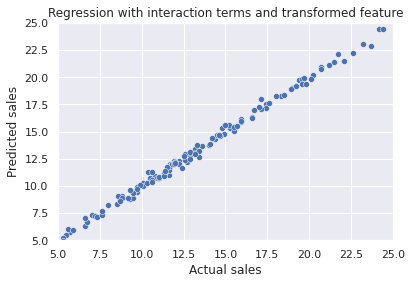

In [ ]:
sns.scatterplot(data=train, x="sales", y=reg_bonus.predict(train[features]));

plt.ylabel('Predicted sales');
plt.ylim(5,25);
plt.xlabel('Actual sales');
plt.xlim(5,25);

plt.title("Regression with interaction terms and transformed feature");


In [ ]:
residual_bonus_train = train['sales'] - reg_bonus.predict(train[features]) 
residual_bonus_test = test['sales'] - reg_bonus.predict(test[features]) 
np.mean(residual_bonus_test)
np.mean(residual_bonus_train)

0.03022825318259579

4.440892098500626e-16

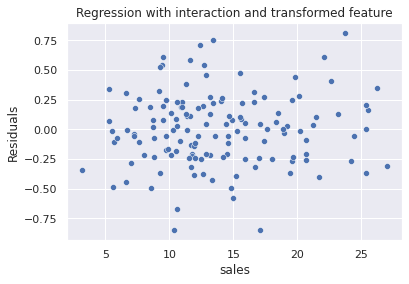

In [ ]:
sns.scatterplot(data=train, x="sales", y=residual_bonus_train);

plt.ylabel('Residuals');
plt.title("Regression with interaction and transformed feature");

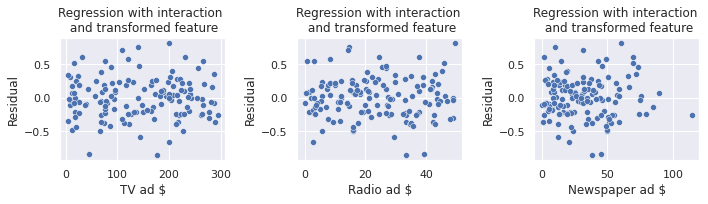

In [ ]:
plt.figure(figsize=(10,3))

plt.subplot(1,3,1)
sns.scatterplot(x=train['TV'], y=residual_bonus_train);
plt.xlabel('TV ad $')
plt.ylabel('Residual');
plt.title("Regression with interaction \n and transformed feature");

plt.subplot(1,3,2)
sns.scatterplot(x=train['radio'], y=residual_bonus_train);
plt.xlabel('Radio ad $')
plt.ylabel('Residual');
plt.title("Regression with interaction \n and transformed feature");

plt.subplot(1,3,3)
sns.scatterplot(x=train['newspaper'], y=residual_bonus_train);
plt.xlabel('Newspaper ad $')
plt.ylabel('Residual');
plt.title("Regression with interaction \n and transformed feature");

plt.tight_layout();

#### Comments on the model with a transformed TV ad budget feature

With the non-linear transformation of the TV ad budget included, the model is more effective at predicting sales. Also, we see no obvious pattern in the residuals, which suggests that our model does about as well as we could expect - we can't see anything "learnable" in the remaining error of our model.

